In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
df = pd.read_csv("house_price.csv")

In [69]:
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [70]:
df.tail()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
13195,Whitefield,5 Bedroom,3453.0,4.0,231.0,5,6689
13196,other,4 BHK,3600.0,5.0,400.0,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.0,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.0,4,10407
13199,Doddathoguru,1 BHK,550.0,1.0,17.0,1,3090


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB


In [72]:
df.shape

(13200, 7)

In [73]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


# Normal distribution method

In [74]:
mean_price_per_sqft =df['price_per_sqft'].mean()
mean_price_per_sqft

7920.336742424242

In [75]:
median_price_per_sqft=df['price_per_sqft'].median()
median_price_per_sqft

5438.0

In [76]:
df['price_per_sqft'].min()

267

In [77]:
std_price_per_sqft=df['price_per_sqft'].std()
std_price_per_sqft

106727.16032810845

In [78]:
df['price_per_sqft'].quantile(0.75)

7317.0

In [79]:
df['price_per_sqft'].max()

12000000

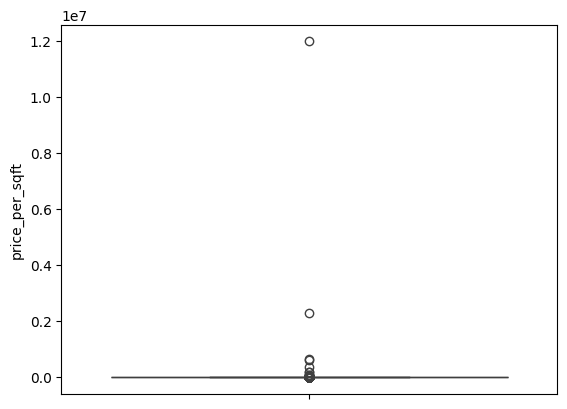

In [80]:
sns.boxplot(df['price_per_sqft'])
plt.show()

*  **in this boxplot we can see the outliers correclty**

C:\Users\DELL\AppData\Local\Temp\ipykernel_14796\1780858689.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'],kde=True)


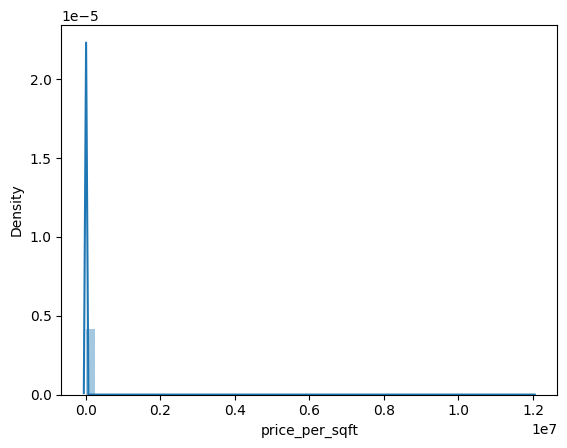

In [81]:
sns.distplot(df['price_per_sqft'],kde=True)
plt.show()

*  **The data  is skwed and there is possible outliers**

In [82]:
upper_limit = mean_price_per_sqft + 3*std_price_per_sqft
lower_limit = mean_price_per_sqft - 3*std_price_per_sqft
print(upper_limit)
print(lower_limit)

328101.8177267496
-312261.1442419011


*   **we have calculated the upper and lower limit of the column price_per_sqft**
*   **3 in here is a threshold that we usually sets for finding out the limits**

In [83]:
df.loc[(df['price_per_sqft'] > upper_limit) | (df['price_per_sqft'] < lower_limit)]


,location,size,total_sqft,bath,price,bhk,price_per_sqft
345,other,3 Bedroom,11.0,3.0,74.0,3,672727
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000
4924,other,7 BHK,5.0,7.0,115.0,7,2300000
11447,Whitefield,4 Bedroom,60.0,4.0,218.0,4,363333


In [84]:
new_df1=df.loc[(df['price_per_sqft'] < upper_limit) & (df['price_per_sqft'] > lower_limit)]
print(len(new_df1))
print(len(df))
print(f"outliers removed :{len(df)-len(new_df1)}")

13195
13200
outliers removed :5


* **There are 5 outliers so removed it and the count of old df and new df is dispalyed above**

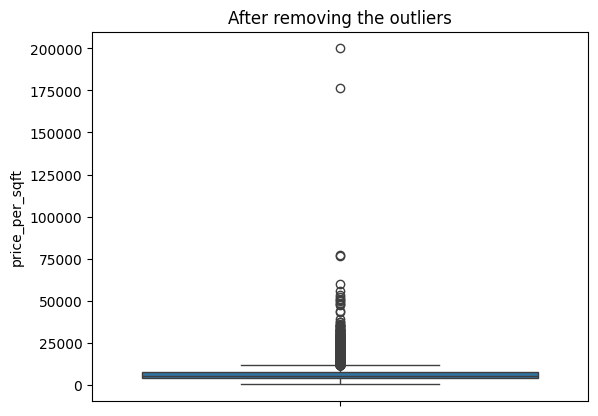

In [85]:
sns.boxplot(new_df1['price_per_sqft'])
plt.title("After removing the outliers")
plt.show()

*  **After the removing of the outliers we can see the changes in the boxplot ,even though there are some outliers present these are allowed outliers** 

<h4>method 2:  **Capping method**</h4>

In [86]:
df.loc[df['price_per_sqft'] > upper_limit, 'price_per_sqft'] = upper_limit
df.loc[df['price_per_sqft'] < lower_limit, 'price_per_sqft'] = lower_limit


C:\Users\DELL\AppData\Local\Temp\ipykernel_14796\2339725297.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '328101.8177267496' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['price_per_sqft'] > upper_limit, 'price_per_sqft'] = upper_limit


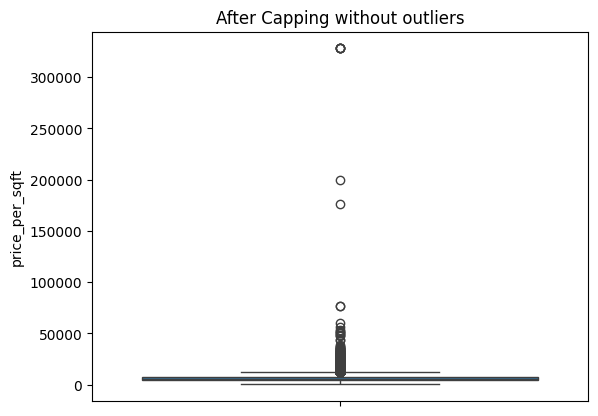

In [87]:
sns.boxplot(df['price_per_sqft'])
plt.title("After Capping without outliers")
plt.show()

*  **After Capping 

C:\Users\DELL\AppData\Local\Temp\ipykernel_14796\3407742427.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])


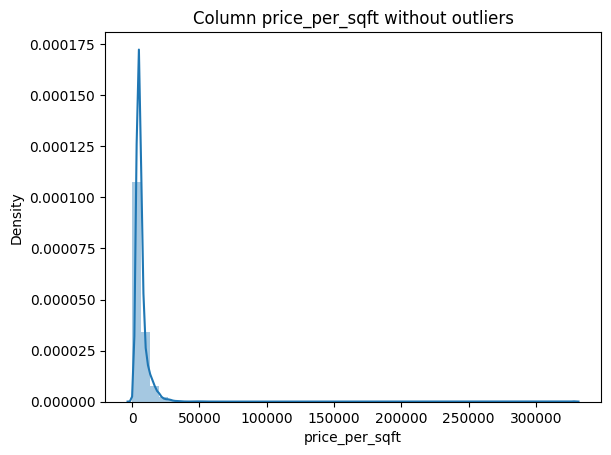

In [88]:
sns.distplot(df['price_per_sqft'])
plt.title('Column price_per_sqft without outliers')
plt.show()

* **above is the method of capping iam setting the value upper_limit to the values greater than upper_limit and vice versa to the lower_limit also**
* **without removing the outliers this will be a suitable method**


# IQR Method

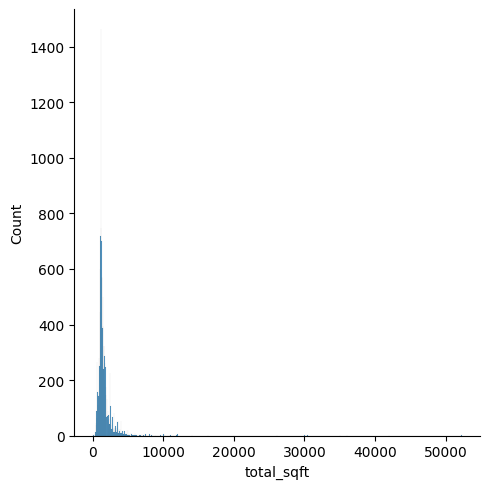

In [89]:
sns.displot(df['total_sqft'])
plt.show()

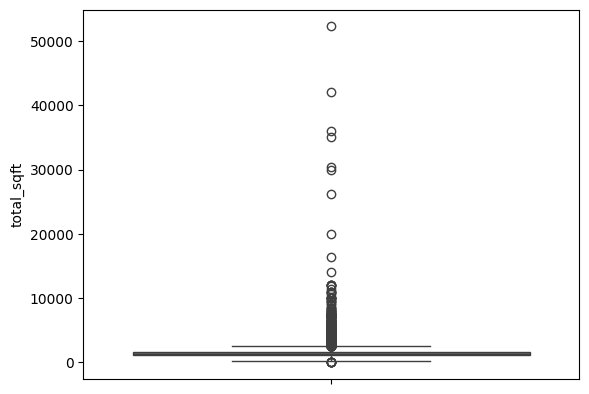

In [90]:
sns.boxplot(df['total_sqft'])
plt.show()

* **the column total_sqft is skwed and has outliers also**
* **In the boxplot we can see all the outliers in it**

In [91]:
mean_total_sqft=df['total_sqft'].mean()
mean_total_sqft

1555.3027829545454

In [92]:
median_total_sqft=df['total_sqft'].median()
median_total_sqft

1275.0

In [93]:
std_total_sqft=df['total_sqft'].std()
std_total_sqft

1237.3234454015123

In [94]:
q1 =df['total_sqft'].quantile(0.25)
q3=df['total_sqft'].quantile(0.75)
IQR = q3-q1

In [95]:
print(f"q1:  {q1}")
print(f"q3 :{q3}")
print(f"IQR  :{IQR}")

q1:  1100.0
q3 :1672.0
IQR  :572.0


In [96]:
upper_whisker =  q3 +(1.5 * IQR)
lower_whisker = q1 -(1.5 * IQR)
upper_whisker,lower_whisker


(2530.0, 242.0)

* **using IQR inter quartile range we find out the upper and lower wisker**
* **The values above and below the upper and lower wisker will be outliers**

In [97]:
outliers_count_total_sqft = df.loc[(df['total_sqft'] > upper_whisker) | (df['total_sqft'] < lower_whisker)]
print(f"length of outliers : {len(outliers_count_total_sqft)}")
print(f"Total length of the dataset : {len(df['total_sqft'])}")

length of outliers : 1149
Total length of the dataset : 13200


In [98]:
df.loc[df['total_sqft'] > upper_whisker, 'total_sqft'] = upper_whisker
df.loc[df['total_sqft'] < lower_whisker,'total_sqft'] = lower_whisker

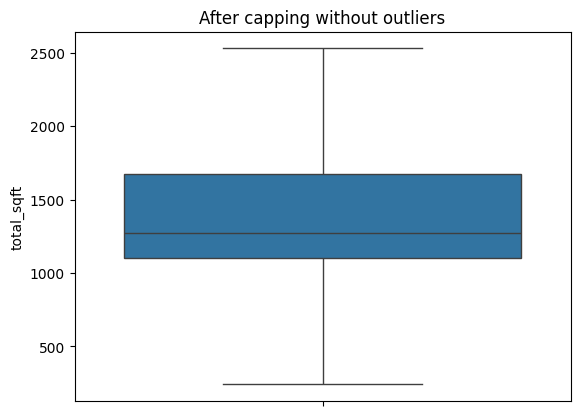

In [99]:
sns.boxplot(df['total_sqft'])
plt.title("After capping without outliers")
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_14796\1968007724.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['total_sqft'])


Text(0.5, 1.0, 'Data without outliers')

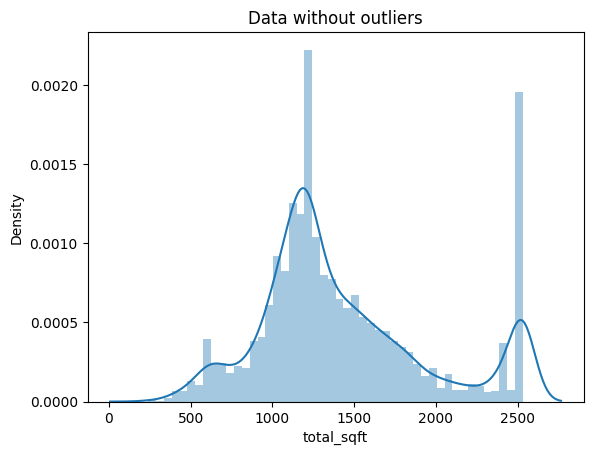

In [100]:
sns.distplot(df['total_sqft'])
plt.title('Data without outliers')

*  **out of 13200 entries in the column total_sqft 1149 is outliers**
*  **we calculated the lower and upper whiskers using the interquartile range and then set's a limit if the values is greater than the upper whisker we will be capping them with value of upper whisker like that for lower whisker also**
*  **After the capping when we  plot the boxplot all the outliers are gone and then we can see a clear Boxplot without any outliers present**

# percentile method

In [101]:
df['price'].mean()

112.27617765151514

In [102]:
df['price'].median()

71.85

C:\Users\DELL\AppData\Local\Temp\ipykernel_14796\580929635.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


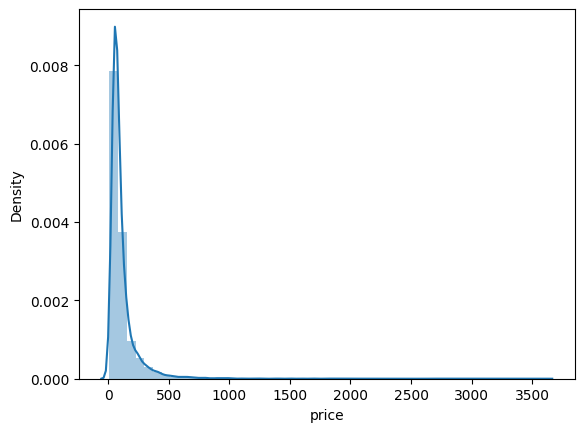

In [103]:
sns.distplot(df['price'])
plt.show()

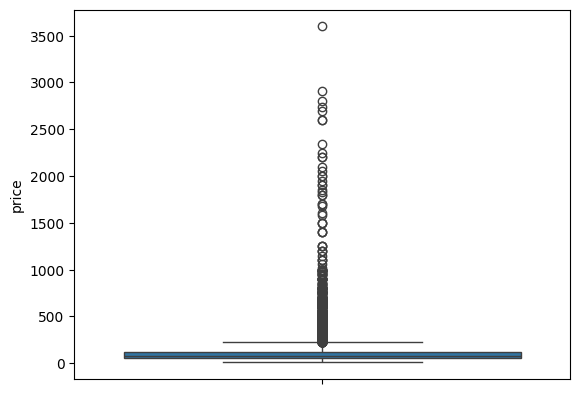

In [104]:
sns.boxplot(df['price'])
plt.show()

*  **By viewing the mean and the median and also the boxplot we can see that there are outliers** 

In [105]:
upper = df['price'].quantile(0.99)
lower = df['price'].quantile(0.01)
print(upper)
print(lower)

660.0
19.0


*   **the 0.99th quantile and the 0.01 quantile is displayed above**
*   **0.99 th quantile is the upper limit**
*   **0.01 th quantile is the lower limit**

In [106]:
outliers_in_price = df.loc[(df['price'] > upper) | (df['price'] < lower)]
new_price = df.loc[(df['price'] <= upper) & (df['price'] >= lower)]
print(f"length of outliers : {len(outliers_in_price)}")
print(f"Total length of the old dataset : {len(df['price'])}")
print(f"Total length of the new dataset after dropping : {len(new_price)}")

length of outliers : 259
Total length of the old dataset : 13200
Total length of the new dataset after dropping : 12941


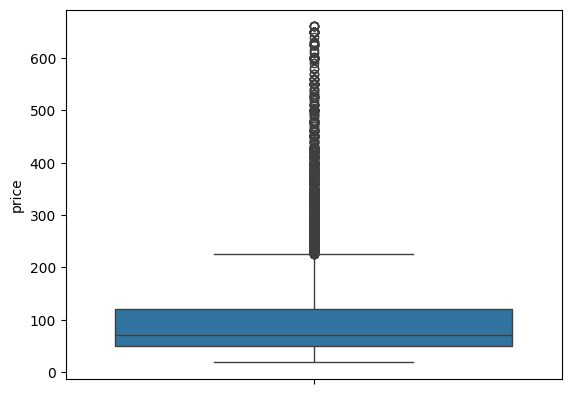

In [107]:
sns.boxplot(new_price['price'])
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_14796\3708790234.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_price['price'])


Text(0.5, 1.0, 'Column price without outliers')

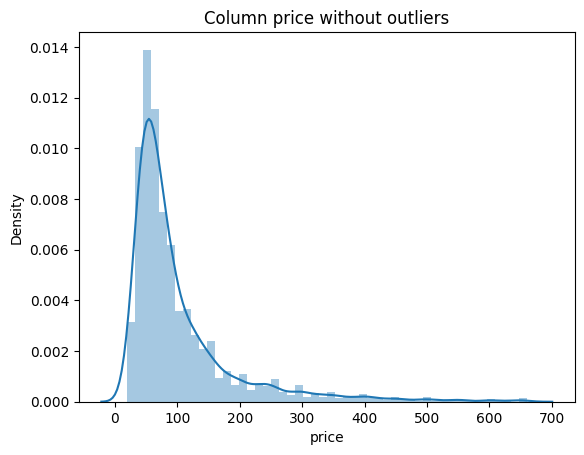

In [108]:
sns.distplot(new_price['price'])
plt.title('Column price without outliers')


* **Above is called trimming removing of outliers  by displaying the  outliers_in_price we can see the new data without outliers in the columnn price**

*  **out of 13200/ 259 is outliers**
*  **After removing we can see the outliers here these are allowed outliers**

In [109]:
df.loc[df['price'] >= upper_whisker, 'price'] = upper
df.loc[df['price'] <= lower_whisker,'price'] = lower

*  **above is the capping method we will be assigning upper values and lower limit values to the outliers which are greater than or less that the given limits**

# Z-score method

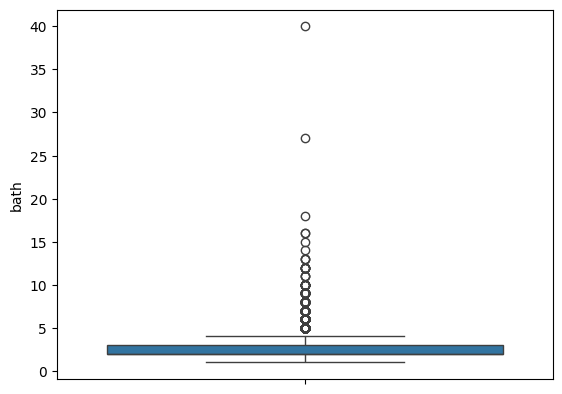

In [110]:
sns.boxplot(df['bath'])
plt.show()

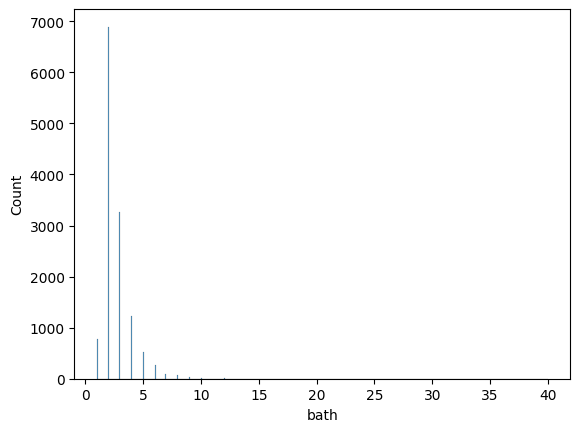

In [111]:
sns.histplot(df['bath'])
plt.show()

* **By viewing the histplot and the boxplot there are possible outliers in the column bath**

In [112]:
mean_bath = df['bath'].mean()
std_bath = df['bath'].std()
median_bath = df['bath'].median()

In [113]:
print(mean_bath)
print(std_bath)
print(median_bath )

2.6911363636363634
1.3389150868179767
2.0


In [114]:
# Define threshold (e.g., 3)
threshold = 3

# Calculate Z-scores
z_scores = np.abs((df['bath'] - mean_bath) / std_bath)
print(z_scores)

0        0.516191
1        1.724429
2        0.516191
3        0.230682
4        0.516191
           ...   
13195    0.977555
13196    1.724429
13197    0.516191
13198    0.977555
13199    1.263065
Name: bath, Length: 13200, dtype: float64


In [115]:
# Detect outliers
outliers_zscore = df[z_scores > threshold]
print(f"No of outliers : {len(outliers_zscore)}")
print(f"Length of old df : {len(df['bath'])}")

No of outliers : 240
Length of old df : 13200


In [116]:
df.loc[z_scores > threshold, 'bath'] = median_bath

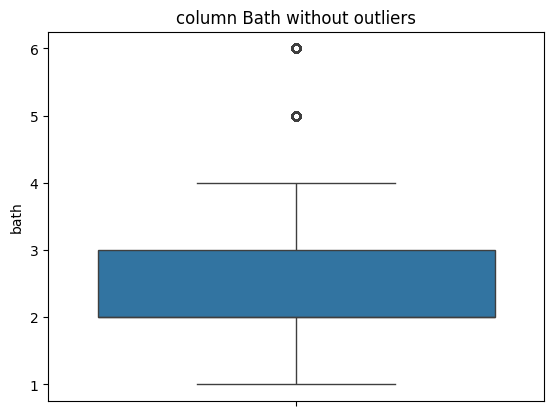

In [117]:
sns.boxplot(df['bath'])
plt.title("column Bath without outliers")
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_14796\2408360957.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bath'])


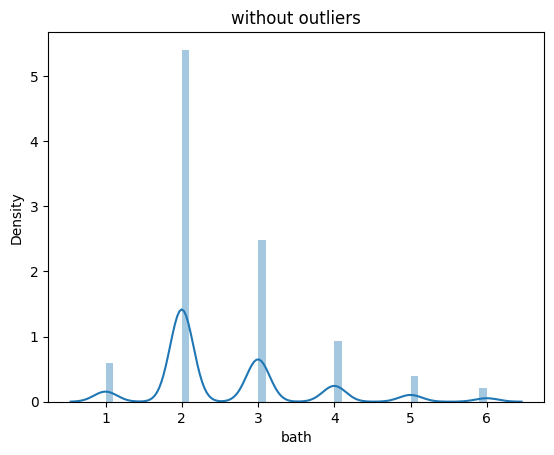

In [118]:
sns.distplot(df['bath'])
plt.title("without outliers")
plt.show()

*  **After detecting the outliers and then we calculated  the z_score for every values**
*  **After that we will taking the z_score  greater  than the thershold and then replacing that values with the median**
*  **After that while ploting the boxplot and the displot we can see the significant decrease in the outliers and there are some outliers present these outliers are called allowed outliers**

In [123]:
df_numeric = df.select_dtypes(include=['number'])  #
correltion_matrix=df_numeric.corr() 
print(correltion_matrix)

                total_sqft      bath     price       bhk  price_per_sqft
total_sqft        1.000000  0.620542  0.454330  0.473181        0.077921
bath              0.620542  1.000000  0.348760  0.602000        0.218647
price             0.454330  0.348760  1.000000  0.292509        0.318517
bhk               0.473181  0.602000  0.292509  1.000000        0.246341
price_per_sqft    0.077921  0.218647  0.318517  0.246341        1.000000


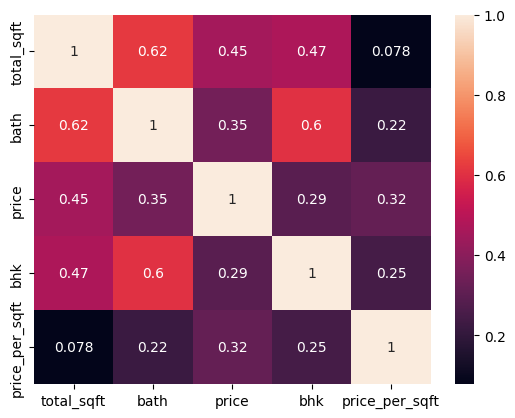

In [127]:
sns.heatmap(correltion_matrix,annot=True)
plt.show()

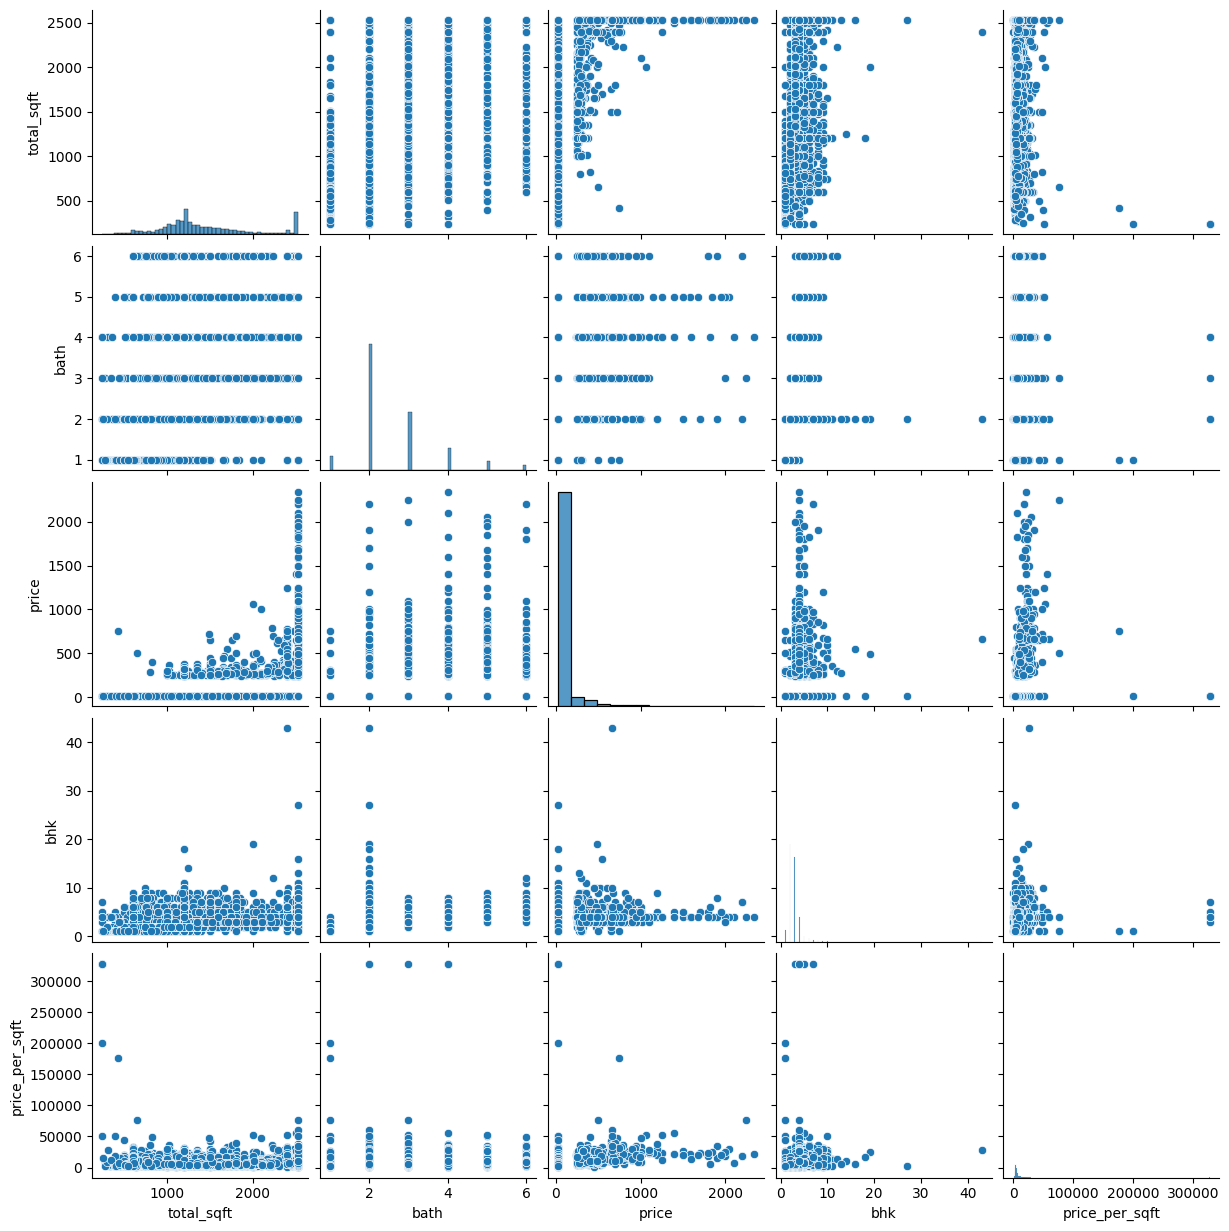

In [128]:
sns.pairplot(df)
plt.show()

*  **The total square footage of a house (total_sqft) has a strong positive correlation with the number of bathrooms (bath) and the price, with correlation coefficients of around 0.62 and 0.45, respectively. This suggests that larger houses tend to have more bathrooms and command higher prices.**



**The number of bathrooms (bath) also has a moderately positive correlation with the price, with a coefficient of 0.35. This indicates that houses with more bathrooms are generally priced higher.**



**The number of bedrooms (bhk) has a relatively weaker positive correlation with the total square footage (0.47), bathrooms (0.6), and price (0.29). This implies that while larger houses tend to have more bedrooms, the number of bedrooms is not as strongly associated with the overall size or price as the number of bathrooms.**



**The price per square foot (price_per_sqft) shows moderate positive correlations with most other features, ranging from 0.22 to 0.32. This suggests that the price per square foot is influenced by various factors, such as the total size, number of bathrooms, and number of bedrooms, but the correlations are not exceptionally strong.**



**Overall, the heatmap highlights the relationships between different features of a house, with the total square footage and number of bathrooms having the strongest positive correlations with the price. This information can be useful for understanding the factors that influence house prices and for potential predictive modeling task**